In [ ]:
!pip install ipython-autotime

%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.5 MB/s eta 0:00:00
time: 864 µs (started: 2024-03-04 04:33:39 +00:00)


In [ ]:
from google.colab import files


uploaded = files.upload()

Saving credit_dataset.csv to credit_dataset.csv
time: 54.8 s (started: 2024-03-04 04:33:39 +00:00)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('credit_dataset.csv',header='infer')
data.head(15)


,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,29,59,3,0
1,1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,4,52,8,0
2,2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
3,3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
4,4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,38,52,8,0
5,5,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,1,1,1,1,2.0,5,46,2,0
6,6,5112956,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,1,1,1,1,2.0,42,46,2,0
7,7,5008819,M,Y,Y,0,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,17,49,3,0
8,8,5008820,M,Y,Y,0,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,16,49,3,0
9,9,5008821,M,Y,Y,0,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,8,49,3,0


time: 1.85 s (started: 2024-03-04 04:34:34 +00:00)


In [ ]:
data.shape
data['TARGET']

0        0
1        0
2        0
3        0
4        0
        ..
25129    1
25130    1
25131    1
25132    1
25133    1
Name: TARGET, Length: 25134, dtype: int64

time: 8.85 ms (started: 2024-03-04 04:34:36 +00:00)


<ipython-input-5-e2bdbe3b267f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x = target_group['TARGET'],y = target_group[0],palette=np.array(pal[::-1])[rank] )
<ipython-input-5-e2bdbe3b267f>:6: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  g = sns.barplot(x = target_group['TARGET'],y = target_group[0],palette=np.array(pal[::-1])[rank] )


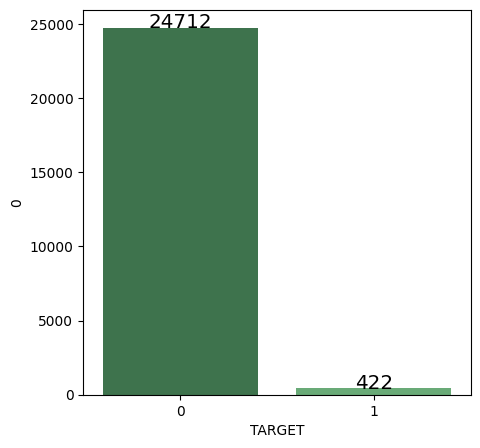

time: 361 ms (started: 2024-03-04 04:34:36 +00:00)


In [ ]:
#Calculating count of Fraud vs No Fraud cases
plt.figure(figsize=(5,5))
target_group = data.groupby('TARGET').size().reset_index()
pal = sns.color_palette("Greens_d", len(target_group))
rank = target_group["TARGET"].argsort().argsort()
g = sns.barplot(x = target_group['TARGET'],y = target_group[0],palette=np.array(pal[::-1])[rank] )

for index, row in target_group.iterrows():
    g.text(row['TARGET'],row[0], round(row[0],2), color='black', ha="center",fontsize='x-large')

Class 0: 24712
Class 1: 422
Proportion: 58.56 : 1


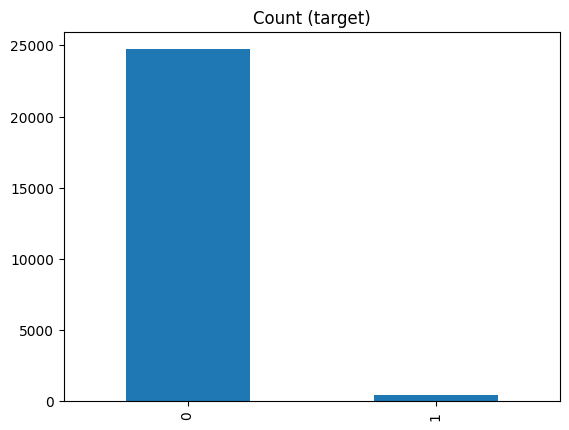

time: 254 ms (started: 2024-03-04 04:34:36 +00:00)


In [ ]:
target_count = data["TARGET"].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [ ]:
print("No. of missing values: ")
for val in data.columns:
  print("\t%s: %d" % (val, data[val].isna().sum()))

data.head()

No. of missing values: 
	Unnamed: 0: 0
	ID: 0
	GENDER: 0
	CAR: 0
	REALITY: 0
	NO_OF_CHILD: 0
	INCOME: 0
	INCOME_TYPE: 0
	EDUCATION_TYPE: 0
	FAMILY_TYPE: 0
	HOUSE_TYPE: 0
	FLAG_MOBIL: 0
	WORK_PHONE: 0
	PHONE: 0
	E_MAIL: 0
	FAMILY SIZE: 0
	BEGIN_MONTH: 0
	AGE: 0
	YEARS_EMPLOYED: 0
	TARGET: 0


,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,29,59,3,0
1,1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,4,52,8,0
2,2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
3,3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
4,4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,38,52,8,0


time: 236 ms (started: 2024-03-04 04:34:37 +00:00)


# **DROPPING COLUMNS/MISSING VALUES**

In [ ]:
drop_cols = ['GENDER','CAR','REALITY','NO_OF_CHILD','FAMILY SIZE','BEGIN_MONTH','EDUCATION_TYPE','HOUSE_TYPE','FAMILY_TYPE','AGE','WORK_PHONE','PHONE','E_MAIL','FLAG_MOBIL','INCOME_TYPE','ID']
data = data.drop(drop_cols, axis = 1)


time: 2.25 ms (started: 2024-03-04 04:34:37 +00:00)


In [ ]:
data.head()

,Unnamed: 0,INCOME,YEARS_EMPLOYED,TARGET
0,0,112500.0,3,0
1,1,270000.0,8,0
2,2,270000.0,8,0
3,3,270000.0,8,0
4,4,270000.0,8,0


time: 39.9 ms (started: 2024-03-04 04:34:37 +00:00)


In [ ]:
dup_data = data.duplicated()
print("No. of duplicated rows: %d" % (dup_data.sum()))

No. of duplicated rows: 0
time: 14.2 ms (started: 2024-03-04 04:34:37 +00:00)


#**USING SMOTE SAMPLING ALGORITHM (RF, SVM, DNN)**

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

time: 688 ms (started: 2024-03-04 04:34:37 +00:00)


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Splitting data into: features (X) and target (y)
X = data.drop(columns=['TARGET'])
y = data['TARGET']

#Standardizing/Normalizing features
scler = StandardScaler() #method for standardizing features by removing the mean and scaling to unit variance.
X_scaled = scler.fit_transform(X) #standardize the features in the X df, fits the scler to the data (calculates mean and SD), then transforms the data using the calculated mean and standard deviation to achieve standardization

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



time: 13 ms (started: 2024-03-04 04:34:38 +00:00)


In [ ]:
from imblearn.over_sampling import SMOTE

# Specify the desired ratio after resampling
# For example, if you want the minority class to have twice as many samples as the majority class:
desired_ratio = 0.5  # ratio of minority to majority class

# Initialize SMOTE with the desired ratio
smoteAlg = SMOTE(sampling_strategy=desired_ratio, random_state=42)

# Apply SMOTE to the training data to balance the classes
X_train_bal, y_train_bal = smoteAlg.fit_resample(X_train, y_train)

time: 14.3 ms (started: 2024-03-04 04:34:38 +00:00)


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

#^^^X_train, X_test, y_train, y_test contain the preprocessed data ready for training/testing

smoteAlg = SMOTE(random_state=42)
X_train_bal, y_train_bal = smoteAlg.fit_resample(X_train, y_train)

# Training the classifier
clf_balanced = RandomForestClassifier(random_state=42)
clf_balanced.fit(X_train_bal, y_train_bal)

# Predictions
y_pred = clf_balanced.predict(X_test)

# Step 4: Record precision and recall
precision_recall = classification_report(y_test, y_pred, output_dict=True)


accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_rf)

pd.DataFrame(precision_recall)

Accuracy: 0.9862087256332052


,0,1,accuracy,macro avg,weighted avg
precision,0.993515,0.597122,0.986209,0.795319,0.986629
recall,0.992443,0.633588,0.986209,0.813015,0.986209
f1-score,0.992979,0.614815,0.986209,0.803897,0.986409
support,7410.000000,131.000000,0.986209,7541.000000,7541.000000


time: 4.54 s (started: 2024-03-04 04:34:38 +00:00)


In [ ]:
import numpy as np

# Count the occurrences of each class in y_train_bal
class_counts = np.bincount(y_train_bal)

# Print the class distribution
for class_label, count in enumerate(class_counts):
    print(f"Class {class_label}: {count} samples")


Class 0: 17302 samples
Class 1: 17302 samples
time: 9.64 ms (started: 2024-03-04 04:34:42 +00:00)


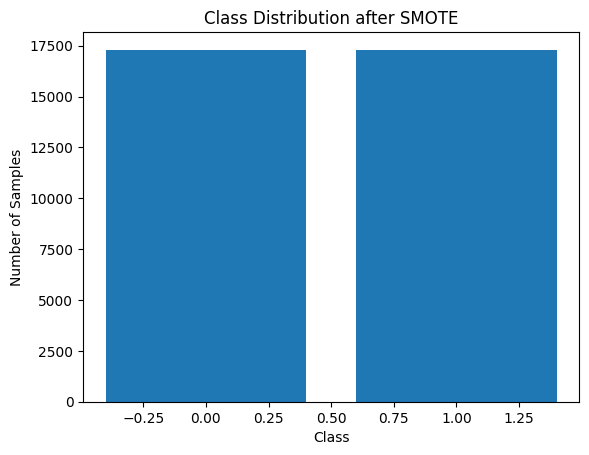

time: 811 ms (started: 2024-03-04 04:34:42 +00:00)


In [ ]:
import matplotlib.pyplot as plt

# Plot the class distribution
plt.bar(range(len(class_counts)), class_counts)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution after SMOTE')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix

# How the confusion matrix matrix is calculated
conf_mat = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_mat)

# The confusion matrix prints like this:
# [True Positive (TP), False Negative (FN)]
# [False Positive (FP), True Negative (TN)]

Confusion Matrix:
[[7354   56]
 [  48   83]]
time: 19.6 ms (started: 2024-03-04 04:34:43 +00:00)


In [ ]:
from sklearn import svm
from sklearn.svm import SVC  # Support Vector Classification
from sklearn.svm import SVR  # Support Vector Regression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_train_bal, y_train_bal)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_svm = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy_svm)
print("\nClassification Report:\n", report)

Accuracy: 0.7162180082217212

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.72      0.83      7410
           1       0.04      0.74      0.08       131

    accuracy                           0.72      7541
   macro avg       0.52      0.73      0.46      7541
weighted avg       0.98      0.72      0.82      7541

time: 59.7 s (started: 2024-03-04 04:34:43 +00:00)


In [ ]:
data.shape

(25134, 4)

time: 5.8 ms (started: 2024-03-04 04:35:43 +00:00)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


#Splitting data into: features (X) and target (y)
X = data.drop(columns=['TARGET'])
y = data['TARGET']

#Standardizing/Normalizing features
scler = StandardScaler() #method for standardizing features by removing the mean and scaling to unit variance.
X_scaled = scler.fit_transform(X) #standardize the features in the X df, fits the scler to the data (calculates mean and SD), then transforms the data using the calculated mean and standard deviation to achieve standardization


#Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

smoteAlg = SMOTE(random_state=42)
X_train_bal, y_train_bal = smoteAlg.fit_resample(X_train, y_train)

X_val_bal, y_val_bal = smoteAlg.fit_resample(X_val, y_val)

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(3,)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''
print(X_train.shape)
print(model.input_shape)
'''

# Train the model
history = model.fit(X_train,y_train, epochs=10, batch_size=32, validation_data=(X_val_bal, y_val_bal))

# Evaluate the model on the test set
loss, accuracy_dnn = model.evaluate(X_test, y_test)

# Make predictions
y_pred = model.predict(X_test)

Epoch 1/10
629/629 [==============================] - 4s 5ms/step - loss: 155.5880 - accuracy: 0.9621 - val_loss: 1474.5811 - val_accuracy: 0.5000
Epoch 2/10
629/629 [==============================] - 2s 3ms/step - loss: 110.4696 - accuracy: 0.9634 - val_loss: 795.2551 - val_accuracy: 0.5000
Epoch 3/10
629/629 [==============================] - 2s 3ms/step - loss: 94.0183 - accuracy: 0.9628 - val_loss: 6018.2891 - val_accuracy: 0.5000
Epoch 4/10
629/629 [==============================] - 2s 2ms/step - loss: 83.2747 - accuracy: 0.9639 - val_loss: 1709.0959 - val_accuracy: 0.5000
Epoch 5/10
629/629 [==============================] - 1s 2ms/step - loss: 54.9546 - accuracy: 0.9640 - val_loss: 402.5052 - val_accuracy: 0.5000
Epoch 6/10
629/629 [==============================] - 2s 2ms/step - loss: 62.2939 - accuracy: 0.9646 - val_loss: 2915.5984 - val_accuracy: 0.5000
Epoch 7/10
629/629 [==============================] - 2s 3ms/step - loss: 46.1730 - accuracy: 0.9644 - val_loss: 341.1939 - 

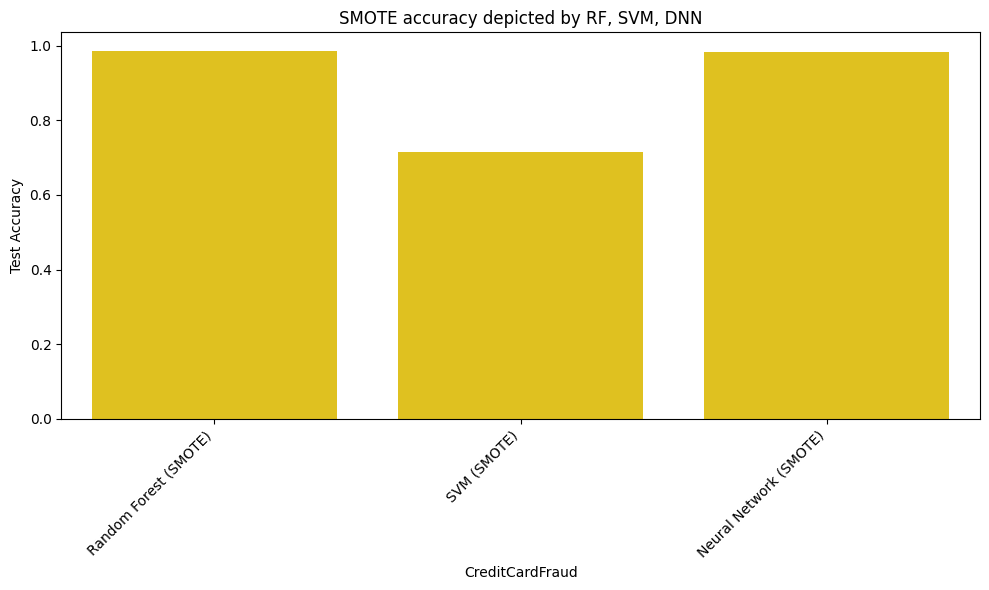

time: 315 ms (started: 2024-03-04 04:36:06 +00:00)


In [ ]:
test_accuracies = {
    'Random Forest (SMOTE)': accuracy_rf,
    'SVM (SMOTE)': accuracy_svm,
    'Neural Network (SMOTE)': accuracy_dnn,
}


# Plotting the test accuracy for each algorithm

plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()), color='gold')
plt.xticks(rotation=45, ha='right')
plt.title('SMOTE accuracy depicted by RF, SVM, DNN')
plt.xlabel('CreditCardFraud')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()

# **USING ADASYN SAMPLING ALGORITHM (RF, SVM, DNN)**

In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming 'X' is your feature matrix and 'y' is your target vector
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the class distribution after applying ADASYN
print("Class distribution before ADASYN:")
print(pd.Series(y_train).value_counts())

# Apply ADASYN to balance the training set
adasyn = ADASYN(random_state=42, sampling_strategy=1.0)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# Check the class distribution after applying ADASYN
print("Class distribution after ADASYN:")
print(pd.Series(y_train_resampled).value_counts())

Class distribution before ADASYN:
0    19771
1      336
Name: TARGET, dtype: int64
Class distribution after ADASYN:
1    19788
0    19771
Name: TARGET, dtype: int64
time: 34.3 ms (started: 2024-03-04 04:36:07 +00:00)


In [ ]:
clf_balanced = RandomForestClassifier(random_state=42)
clf_balanced.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred = clf_balanced.predict(X_test)

# Step 4: Record precision and recall
precision_recall = classification_report(y_test, y_pred, output_dict=True)

accuracy_rf_adasyn = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_rf_adasyn)

pd.DataFrame(precision_recall)

Accuracy: 0.9854784165506266


,0,1,accuracy,macro avg,weighted avg
precision,0.993512,0.568421,0.985478,0.780966,0.986239
recall,0.991702,0.627907,0.985478,0.809805,0.985478
f1-score,0.992606,0.596685,0.985478,0.794646,0.985833
support,4941.000000,86.000000,0.985478,5027.000000,5027.000000


time: 3.63 s (started: 2024-03-04 04:36:07 +00:00)


In [ ]:
# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_svm_adasyn = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy_svm_adasyn)
print("\nClassification Report:\n", report)

Accuracy: 0.6801273125124329

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.68      0.81      4941
           1       0.04      0.76      0.07        86

    accuracy                           0.68      5027
   macro avg       0.52      0.72      0.44      5027
weighted avg       0.98      0.68      0.79      5027

time: 57.8 s (started: 2024-03-04 04:36:10 +00:00)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


#Splitting data into: features (X) and target (y)
X = data.drop(columns=['TARGET'])
y = data['TARGET']

#Standardizing/Normalizing features
scler = StandardScaler() #method for standardizing features by removing the mean and scaling to unit variance.
X_scaled = scler.fit_transform(X) #standardize the features in the X df, fits the scler to the data (calculates mean and SD), then transforms the data using the calculated mean and standard deviation to achieve standardization


#Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

adasyn = ADASYN(random_state=42, sampling_strategy=1.0)
X_train_bal, y_train_bal = adasyn.fit_resample(X_train, y_train)

X_val_bal, y_val_bal = adasyn.fit_resample(X_val, y_val)

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(3,)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''
print(X_train.shape)
print(model.input_shape)
'''

# Train the model
history = model.fit(X_train,y_train, epochs=10, batch_size=32, validation_data=(X_val_bal, y_val_bal))

# Evaluate the model on the test set
loss, accuracy_dnn_adasyn = model.evaluate(X_test, y_test)

# Make predictions
y_pred = model.predict(X_test)


Epoch 1/10
629/629 [==============================] - 2s 3ms/step - loss: 0.1038 - accuracy: 0.9826 - val_loss: 1.6957 - val_accuracy: 0.4991
Epoch 2/10
629/629 [==============================] - 2s 2ms/step - loss: 0.0755 - accuracy: 0.9833 - val_loss: 1.6844 - val_accuracy: 0.4991
Epoch 3/10
629/629 [==============================] - 2s 3ms/step - loss: 0.0700 - accuracy: 0.9833 - val_loss: 1.3287 - val_accuracy: 0.4991
Epoch 4/10
629/629 [==============================] - 2s 2ms/step - loss: 0.0671 - accuracy: 0.9833 - val_loss: 1.2308 - val_accuracy: 0.4991
Epoch 5/10
629/629 [==============================] - 2s 3ms/step - loss: 0.0652 - accuracy: 0.9834 - val_loss: 1.2583 - val_accuracy: 0.4991
Epoch 6/10
629/629 [==============================] - 2s 3ms/step - loss: 0.0644 - accuracy: 0.9833 - val_loss: 1.1871 - val_accuracy: 0.4991
Epoch 7/10
629/629 [==============================] - 1s 2ms/step - loss: 0.0631 - accuracy: 0.9837 - val_loss: 1.0439 - val_accuracy: 0.5605
Epoch 

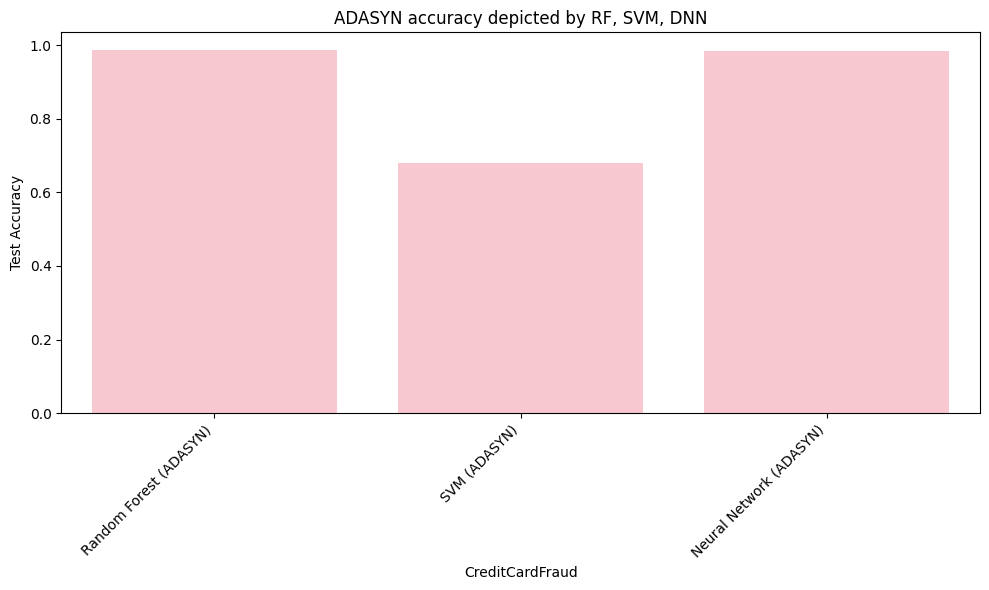

time: 300 ms (started: 2024-03-04 04:37:26 +00:00)


In [ ]:
test_accuracies = {
    'Random Forest (ADASYN)': accuracy_rf_adasyn,
    'SVM (ADASYN)': accuracy_svm_adasyn,
    'Neural Network (ADASYN)': accuracy_dnn_adasyn,
}


# Plotting the test accuracy for each algorithm

plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()), color='pink')
plt.xticks(rotation=45, ha='right')
plt.title('ADASYN accuracy depicted by RF, SVM, DNN')
plt.xlabel('CreditCardFraud')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()

#**USING RANDOM OVER SAMPLING ALGORITHM (RF, SVM, DNN)**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# Assuming 'X' is your feature matrix and 'y' is your target vector
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Check the class distribution after oversampling
print("Class distribution after Random Oversampling:")
print(pd.Series(y_resampled).value_counts())

Class distribution after Random Oversampling:
0    19771
1    19771
Name: TARGET, dtype: int64
time: 14.3 ms (started: 2024-03-04 04:37:26 +00:00)


In [ ]:
# Training the classifier
clf_balanced = RandomForestClassifier(random_state=42)
clf_balanced.fit(X_resampled, y_resampled)

# Predictions
y_pred = clf_balanced.predict(X_test)

# Step 4: Record precision and recall
precision_recall = classification_report(y_test, y_pred, output_dict=True)

accuracy_rf_rof = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_rf_rof)

pd.DataFrame(precision_recall)

Accuracy: 0.9864757358790772


,0,1,accuracy,macro avg,weighted avg
precision,0.991136,0.625000,0.986476,0.808068,0.985019
recall,0.995146,0.476190,0.986476,0.735668,0.986476
f1-score,0.993137,0.540541,0.986476,0.766839,0.985576
support,2472.000000,42.000000,0.986476,2514.000000,2514.000000


time: 2.17 s (started: 2024-03-04 04:37:26 +00:00)


In [ ]:
# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_resampled, y_resampled)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_svm_rof = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy_svm_rof)
print("\nClassification Report:\n", report)

Accuracy: 0.7080350039777248

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.71      0.83      2472
           1       0.03      0.62      0.07        42

    accuracy                           0.71      2514
   macro avg       0.51      0.66      0.45      2514
weighted avg       0.97      0.71      0.81      2514

time: 55.2 s (started: 2024-03-04 04:37:28 +00:00)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


#Splitting data into: features (X) and target (y)
X = data.drop(columns=['TARGET'])
y = data['TARGET']

#Standardizing/Normalizing features
scler = StandardScaler() #method for standardizing features by removing the mean and scaling to unit variance.
X_scaled = scler.fit_transform(X) #standardize the features in the X df, fits the scler to the data (calculates mean and SD), then transforms the data using the calculated mean and standard deviation to achieve standardization


#Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

ros = RandomOverSampler(random_state=42)
X_train_bal, y_train_bal = ros.fit_resample(X_train, y_train)

X_val_bal, y_val_bal = ros.fit_resample(X_val, y_val)

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(3,)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''
print(X_train.shape)
print(model.input_shape)
'''

# Train the model
history = model.fit(X_train,y_train, epochs=10, batch_size=32, validation_data=(X_val_bal, y_val_bal))

# Evaluate the model on the test set
loss, accuracy_dnn_rof = model.evaluate(X_test, y_test)

# Make predictions
y_pred = model.predict(X_test)

Epoch 1/10
629/629 [==============================] - 2s 3ms/step - loss: 0.1062 - accuracy: 0.9826 - val_loss: 2.0273 - val_accuracy: 0.5000
Epoch 2/10
629/629 [==============================] - 2s 2ms/step - loss: 0.0744 - accuracy: 0.9833 - val_loss: 1.2423 - val_accuracy: 0.5000
Epoch 3/10
629/629 [==============================] - 2s 3ms/step - loss: 0.0697 - accuracy: 0.9833 - val_loss: 1.7531 - val_accuracy: 0.5000
Epoch 4/10
629/629 [==============================] - 1s 2ms/step - loss: 0.0671 - accuracy: 0.9832 - val_loss: 1.3276 - val_accuracy: 0.5000
Epoch 5/10
629/629 [==============================] - 2s 3ms/step - loss: 0.0649 - accuracy: 0.9833 - val_loss: 1.2509 - val_accuracy: 0.5000
Epoch 6/10
629/629 [==============================] - 2s 3ms/step - loss: 0.0639 - accuracy: 0.9833 - val_loss: 0.8540 - val_accuracy: 0.6764
Epoch 7/10
629/629 [==============================] - 1s 2ms/step - loss: 0.0622 - accuracy: 0.9834 - val_loss: 1.1870 - val_accuracy: 0.5000
Epoch 

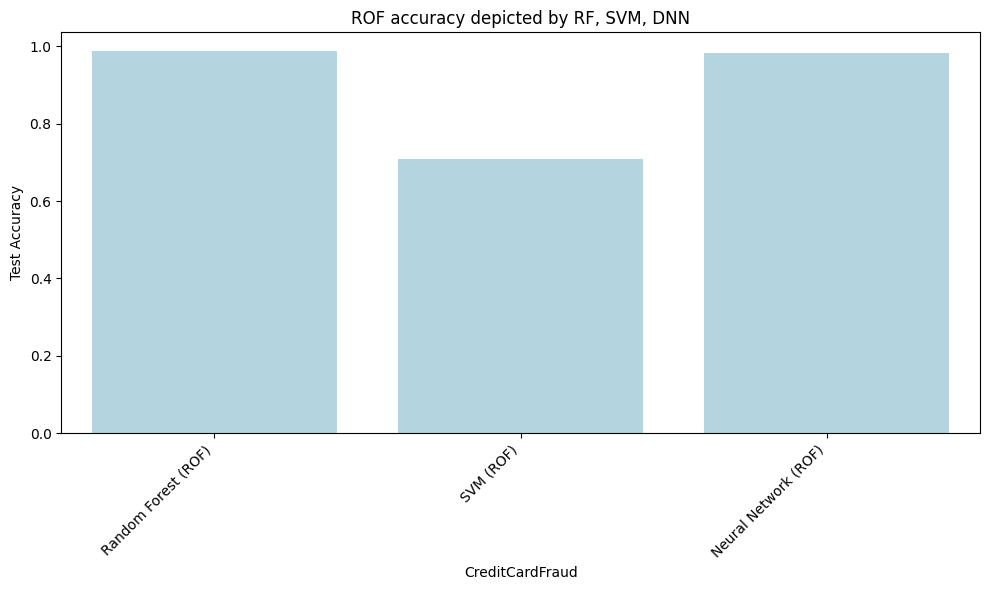

time: 301 ms (started: 2024-03-04 04:38:46 +00:00)


In [ ]:
test_accuracies = {
    'Random Forest (ROF)': accuracy_rf_rof,
    'SVM (ROF)': accuracy_svm_rof,
    'Neural Network (ROF)': accuracy_dnn_rof,
}


# Plotting the test accuracy for each algorithm

plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()), color = 'lightblue')
plt.xticks(rotation=45, ha='right')
plt.title('ROF accuracy depicted by RF, SVM, DNN')
plt.xlabel('CreditCardFraud')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()

#**USING RANDOM UNDER SAMPLING ALGORITHM (RF, SVM, DNN)**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Assuming 'X' is your feature matrix and 'y' is your target vector
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Check the class distribution after oversampling
print("Class distribution after Random Oversampling:")
print(pd.Series(y_resampled).value_counts())

Class distribution after Random Oversampling:
0    336
1    336
Name: TARGET, dtype: int64
time: 14.2 ms (started: 2024-03-04 04:38:47 +00:00)


In [ ]:
# Training the classifier
clf_balanced = RandomForestClassifier(random_state=42)
clf_balanced.fit(X_resampled, y_resampled)

# Predictions
y_pred = clf_balanced.predict(X_test)

# Step 4: Record precision and recall
precision_recall = classification_report(y_test, y_pred, output_dict=True)

accuracy_rf_ruf = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_rf_ruf)

pd.DataFrame(precision_recall)

Accuracy: 0.8802704852824185


,0,1,accuracy,macro avg,weighted avg
precision,0.993185,0.086262,0.88027,0.539723,0.978033
recall,0.884304,0.642857,0.88027,0.763581,0.880270
f1-score,0.935587,0.152113,0.88027,0.543850,0.922498
support,2472.000000,42.000000,0.88027,2514.000000,2514.000000


time: 248 ms (started: 2024-03-04 04:38:47 +00:00)


In [ ]:
# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_resampled, y_resampled)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_svm_ruf = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy_svm_ruf)
print("\nClassification Report:\n", report)

Accuracy: 0.7040572792362768

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.71      0.82      2472
           1       0.03      0.62      0.07        42

    accuracy                           0.70      2514
   macro avg       0.51      0.66      0.44      2514
weighted avg       0.97      0.70      0.81      2514

time: 63.7 ms (started: 2024-03-04 04:38:47 +00:00)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


#Splitting data into: features (X) and target (y)
X = data.drop(columns=['TARGET'])
y = data['TARGET']

#Standardizing/Normalizing features
scler = StandardScaler() #method for standardizing features by removing the mean and scaling to unit variance.
X_scaled = scler.fit_transform(X) #standardize the features in the X df, fits the scler to the data (calculates mean and SD), then transforms the data using the calculated mean and standard deviation to achieve standardization


#Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

rus = RandomUnderSampler(random_state=42)
X_train_bal, y_train_bal = rus.fit_resample(X_train, y_train)

X_val_bal, y_val_bal = rus.fit_resample(X_val, y_val)

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(3,)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''
print(X_train.shape)
print(model.input_shape)
'''

# Train the model
history = model.fit(X_train,y_train, epochs=10, batch_size=32, validation_data=(X_val_bal, y_val_bal))

# Evaluate the model on the test set
loss, accuracy_dnn_ruf = model.evaluate(X_test, y_test)

# Make predictions
y_pred = model.predict(X_test)

Epoch 1/10
629/629 [==============================] - 2s 2ms/step - loss: 0.1123 - accuracy: 0.9744 - val_loss: 1.6014 - val_accuracy: 0.5000
Epoch 2/10
629/629 [==============================] - 1s 2ms/step - loss: 0.0747 - accuracy: 0.9833 - val_loss: 1.5040 - val_accuracy: 0.5000
Epoch 3/10
629/629 [==============================] - 1s 2ms/step - loss: 0.0699 - accuracy: 0.9833 - val_loss: 1.2895 - val_accuracy: 0.5000
Epoch 4/10
629/629 [==============================] - 1s 2ms/step - loss: 0.0671 - accuracy: 0.9833 - val_loss: 1.3517 - val_accuracy: 0.5000
Epoch 5/10
629/629 [==============================] - 1s 2ms/step - loss: 0.0663 - accuracy: 0.9832 - val_loss: 1.3953 - val_accuracy: 0.5000
Epoch 6/10
629/629 [==============================] - 1s 2ms/step - loss: 0.0642 - accuracy: 0.9833 - val_loss: 1.3350 - val_accuracy: 0.5000
Epoch 7/10
629/629 [==============================] - 2s 3ms/step - loss: 0.0632 - accuracy: 0.9834 - val_loss: 1.2763 - val_accuracy: 0.5000
Epoch 

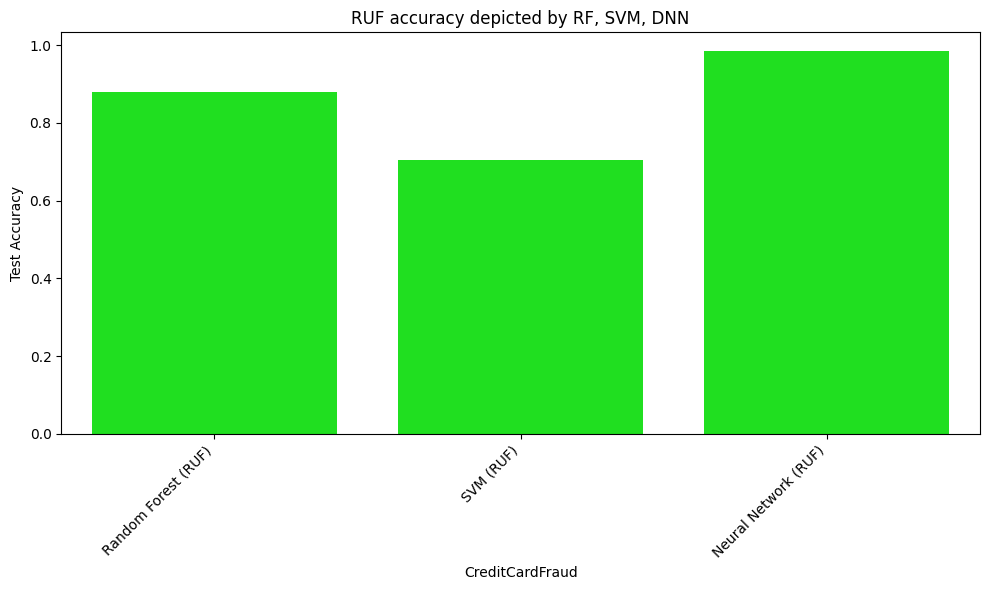

time: 422 ms (started: 2024-03-04 04:39:09 +00:00)


In [ ]:
test_accuracies = {
    'Random Forest (RUF)': accuracy_rf_ruf,
    'SVM (RUF)': accuracy_svm_ruf,
    'Neural Network (RUF)': accuracy_dnn_ruf,
}


# Plotting the test accuracy for each algorithm

plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()), color = 'lime')
plt.xticks(rotation=45, ha='right')
plt.title('RUF accuracy depicted by RF, SVM, DNN')
plt.xlabel('CreditCardFraud')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()

# **USING GAMMA DISTRIBUTION (RF, SVM, DNN)**

In [ ]:
import numpy as np
from sklearn.utils import resample
from sklearn.utils import shuffle
import pandas as pd

# Assuming 'X' is your feature matrix and 'y' is your target vector

# Separate minority and majority classes
X_minority = X_scaled[y == 1]
X_majority = X_scaled[y == 0]

# Determine the size of the minority class
minority_size = len(X_minority)

# Define parameters for the Gamma distribution
shape = 2.0  # Shape parameter of the Gamma distribution
scale = 1.0  # Scale parameter of the Gamma distribution

# Generate random indices for sampling from the majority class
#gamma_indices = pd.random.gamma(shape, scale, size=minority_size).astype(int)

gamma_indices = np.round(np.random.gamma(shape, scale, size=minority_size)).astype(int)

# Sample from the majority class using the Gamma indices
#X_majority_sampled = X_majority.iloc[gamma_indices]
X_majority_sampled = X_majority[gamma_indices]

# Combine minority class samples with sampled majority class samples
X_resampled = np.concatenate([X_minority, X_majority_sampled])
y_resampled = np.concatenate([pd.Series(np.ones(minority_size)), pd.Series(np.zeros(minority_size))])

# Shuffle the resampled data
X_resampled, y_resampled = shuffle(X_resampled, y_resampled, random_state=42)

# Check the class distribution after resampling
print("Class distribution after Gamma distribution-based sampling:")
print(pd.Series(y_resampled).value_counts())

Class distribution after Gamma distribution-based sampling:
0.0    422
1.0    422
dtype: int64
time: 12.4 ms (started: 2024-03-04 04:39:10 +00:00)


In [ ]:
#Tuning hyperparameteres to get a better accuracy from GAMMA
'''
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV

# Define the random forest classifier
clf = RandomForestClassifier(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)

# Get the best model from grid search
best_clf = grid_search.best_estimator_

# Train the best model on the entire resampled dataset
best_clf.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = best_clf.predict(X_test)

# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nClassification Report:")
print(classification_rep)
'''

'\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report\nfrom sklearn.model_selection import GridSearchCV\n\n# Define the random forest classifier\nclf = RandomForestClassifier(random_state=42)\n\n# Define hyperparameters to tune\nparam_grid = {\n    \'n_estimators\': [100, 200, 300],\n    \'max_depth\': [None, 10, 20],\n    \'min_samples_split\': [2, 5, 10],\n    \'min_samples_leaf\': [1, 2, 4]\n}\n\n# Perform grid search cross-validation to find the best hyperparameters\ngrid_search = GridSearchCV(clf, param_grid, cv=5, scoring=\'accuracy\')\ngrid_search.fit(X_resampled, y_resampled)\n\n# Get the best model from grid search\nbest_clf = grid_search.best_estimator_\n\n# Train the best model on the entire resampled dataset\nbest_clf.fit(X_resampled, y_resampled)\n\n# Make predictions on the test set\ny_pred = best_clf.predict(X_test)\n\n# Evaluate the model using various metrics\na

time: 7.76 ms (started: 2024-03-04 04:39:10 +00:00)


In [ ]:
# Training the classifier
clf_balanced = RandomForestClassifier(random_state=42)
clf_balanced.fit(X_resampled, y_resampled)

# Predictions
y_pred = clf_balanced.predict(X_test)

# Step 4: Record precision and recall
precision_recall = classification_report(y_test, y_pred, output_dict=True)

accuracy_rf_gamma = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_rf_gamma)

pd.DataFrame(precision_recall)

Accuracy: 0.024661893396976928


,0,1,accuracy,macro avg,weighted avg
precision,1.000000,0.016840,0.024662,0.508420,0.983575
recall,0.008091,1.000000,0.024662,0.504045,0.024662
f1-score,0.016051,0.033123,0.024662,0.024587,0.016337
support,2472.000000,42.000000,0.024662,2514.000000,2514.000000


time: 355 ms (started: 2024-03-04 04:39:10 +00:00)


In [ ]:
# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_resampled, y_resampled)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_svm_gamma = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy_svm_gamma)
print("\nClassification Report:\n", report)

Accuracy: 0.07677008750994431

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.06      0.12      2472
           1       0.02      0.93      0.03        42

    accuracy                           0.08      2514
   macro avg       0.50      0.50      0.07      2514
weighted avg       0.96      0.08      0.12      2514

time: 38.4 ms (started: 2024-03-04 04:39:10 +00:00)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


#Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(3,)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''
print(X_train.shape)
print(model.input_shape)
'''

# Train the model
history = model.fit(X_train,y_train, epochs=10, batch_size=32, validation_data=(X_val_bal, y_val_bal))

# Evaluate the model on the test set
loss, accuracy_dnn_gamma = model.evaluate(X_test, y_test)

# Make predictions
y_pred = model.predict(X_test)

Epoch 1/10
22/22 [==============================] - 2s 12ms/step - loss: 0.5143 - accuracy: 0.8652 - val_loss: 0.5429 - val_accuracy: 0.7159
Epoch 2/10
22/22 [==============================] - 0s 4ms/step - loss: 0.2650 - accuracy: 0.9348 - val_loss: 0.5734 - val_accuracy: 0.7045
Epoch 3/10
22/22 [==============================] - 0s 4ms/step - loss: 0.1640 - accuracy: 0.9511 - val_loss: 0.7432 - val_accuracy: 0.6818
Epoch 4/10
22/22 [==============================] - 0s 5ms/step - loss: 0.1293 - accuracy: 0.9556 - val_loss: 0.9508 - val_accuracy: 0.6705
Epoch 5/10
22/22 [==============================] - 0s 5ms/step - loss: 0.1106 - accuracy: 0.9630 - val_loss: 1.1175 - val_accuracy: 0.6477
Epoch 6/10
22/22 [==============================] - 0s 4ms/step - loss: 0.0982 - accuracy: 0.9659 - val_loss: 1.3015 - val_accuracy: 0.6250
Epoch 7/10
22/22 [==============================] - 0s 4ms/step - loss: 0.0887 - accuracy: 0.9659 - val_loss: 1.4984 - val_accuracy: 0.6136
Epoch 8/10
22/22 [=

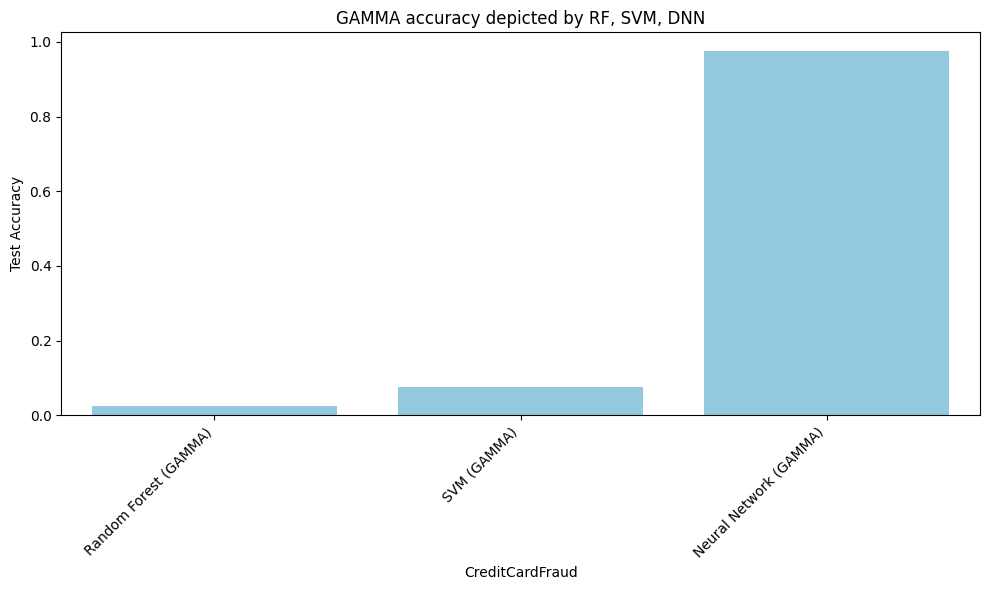

time: 300 ms (started: 2024-03-04 04:39:13 +00:00)


In [ ]:
test_accuracies = {
    'Random Forest (GAMMA)': accuracy_rf_gamma,
    'SVM (GAMMA)': accuracy_svm_gamma,
    'Neural Network (GAMMA)': accuracy_dnn_gamma,
}


# Plotting the test accuracy for each algorithm

plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()), color = 'skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('GAMMA accuracy depicted by RF, SVM, DNN')
plt.xlabel('CreditCardFraud')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()

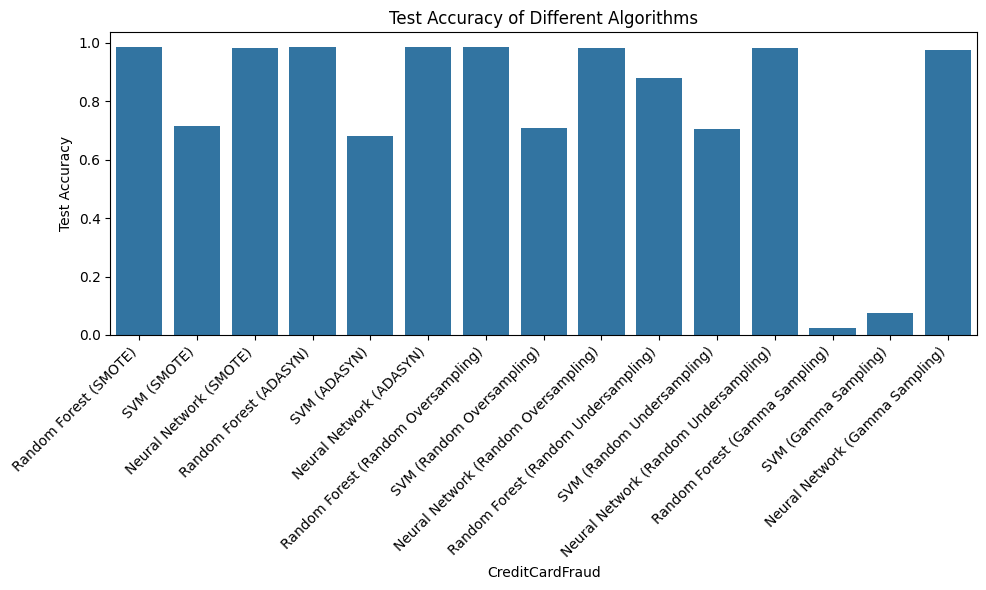

time: 449 ms (started: 2024-03-04 04:39:14 +00:00)


In [ ]:
# Store the test accuracies for each algorithm
# Adjusted dictionary to match your variables
test_accuracies = {
    'Random Forest (SMOTE)': accuracy_rf,
    'SVM (SMOTE)': accuracy_svm,
    'Neural Network (SMOTE)': accuracy_dnn,
    'Random Forest (ADASYN)': accuracy_rf_adasyn,
    'SVM (ADASYN)': accuracy_svm_adasyn,
    'Neural Network (ADASYN)': accuracy_dnn_adasyn,
    'Random Forest (Random Oversampling)': accuracy_rf_rof,
    'SVM (Random Oversampling)': accuracy_svm_rof,
    'Neural Network (Random Oversampling)': accuracy_dnn_rof,
    'Random Forest (Random Undersampling)': accuracy_rf_ruf,
    'SVM (Random Undersampling)': accuracy_svm_ruf,
    'Neural Network (Random Undersampling)': accuracy_dnn_ruf,
    'Random Forest (Gamma Sampling)': accuracy_rf_gamma,
    'SVM (Gamma Sampling)': accuracy_svm_gamma,
    'Neural Network (Gamma Sampling)': accuracy_dnn_gamma,
}


# Plotting the test accuracy for each algorithm
plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()))
plt.xticks(rotation=45, ha='right')
plt.title('Test Accuracy of Different Algorithms')
plt.xlabel('CreditCardFraud')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()

#**END OF ANALYSIS**

In [ ]:
SMOTE_mean = (accuracy_svm + accuracy_rf + accuracy_dnn)/3 *100
print("SMOTE avg : ", SMOTE_mean)

adasyn_mean = (accuracy_svm_adasyn + accuracy_rf_adasyn + accuracy_dnn_adasyn)/3 *100
print("adasyn avg : ", adasyn_mean)

ros_mean = (accuracy_svm_rof + accuracy_rf_rof + accuracy_dnn_rof)/3 * 100
print("ros avg : ", ros_mean)

rus_mean = (accuracy_svm_ruf + accuracy_rf_ruf + accuracy_dnn_ruf)/3 * 100
print("rus avg : ", rus_mean)

gamma_mean = (accuracy_svm_gamma + accuracy_rf_gamma + accuracy_dnn_gamma)/3 * 100
print("gamma avg : ", gamma_mean)

SMOTE avg :  89.52400890600404
adasyn avg :  88.32316018606906
ros avg :  89.2601424393999
rus avg :  85.60063664143739
gamma avg :  35.930085684822586
time: 1.66 ms (started: 2024-03-04 04:39:14 +00:00)
